### Data Mining Assignment Submitted by

## Name: Komal Ketan Sheth
## PRN No: 21020343062

### MBA(Business Analytics) 2021-2023

In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import missingno as msno
import matplotlib.ticker as tk
%matplotlib inline
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from imblearn.over_sampling import SMOTE

# Problem 1 - Classification

# EDA

In [2]:
#Step 1: Read the dataset
Loan_Data=pd.read_csv("Classification.csv")

In [3]:
#Step 2: Display top 5 rows to check if the dataset is loaded completely and correctly
Loan_Data.head()

,ID,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Area_of_Property,Loan_Status
0,1,5849,0.0,NaN,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,2,4583,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3,3000,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,4,2583,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,5,6000,0.0,141.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y


In [4]:
#Step 3: Get the shape that is number of rows and columns the dataset consists of
Loan_Data.shape

(614, 13)

In [5]:
#Drop ID column as no relevant

Loan_Data=Loan_Data.drop(['ID'],axis=1)

In [6]:
#Step 4: Get statistics data of numerical features
Loan_Data.describe()

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

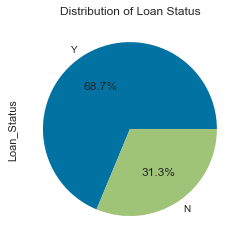

In [7]:
# Step 5: create the pie chart of distribution of loan_status
ax = Loan_Data['Loan_Status'].value_counts().plot(kind='pie',figsize=(8,4),autopct='%.1f%%')
ax.set_title("Distribution of Loan Status")  # set the title
100*Loan_Data['Loan_Status'].value_counts()/len(Loan_Data['Loan_Status'])

In [8]:
#Step 6: Check values of 'Yes' or 'No' of Loan_Status
Loan_Data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

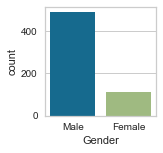

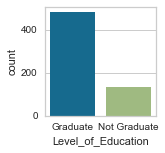

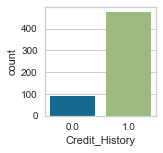

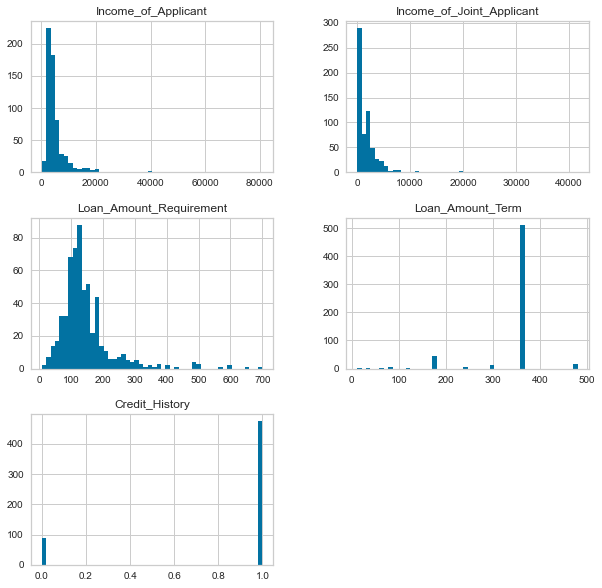

In [10]:
#Step 7: Univariate Analysis
plt.figure(figsize=(2,2))
sns.countplot(data=Loan_Data, x='Gender')
plt.figure(figsize=(2,2))
sns.countplot(data=Loan_Data, x='Level_of_Education')
plt.figure(figsize=(2,2))
sns.countplot(data=Loan_Data, x='Credit_History')
Loan_Data.hist(bins=50, figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

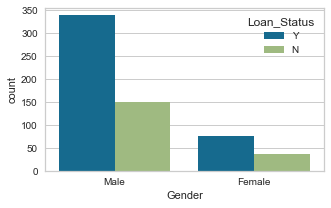

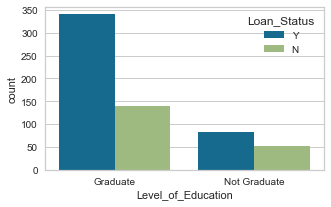

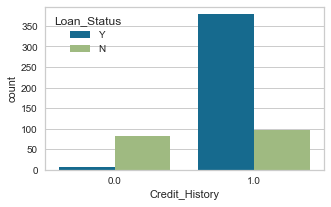

In [11]:
#Step 8: Bivariate Analysis
plt.figure(figsize = (5,3))
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = Loan_Data )
plt.figure(figsize = (5,3))
sns.countplot(x = 'Level_of_Education', hue = 'Loan_Status', data = Loan_Data )
plt.figure(figsize = (5,3))
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = Loan_Data )

<AxesSubplot:>

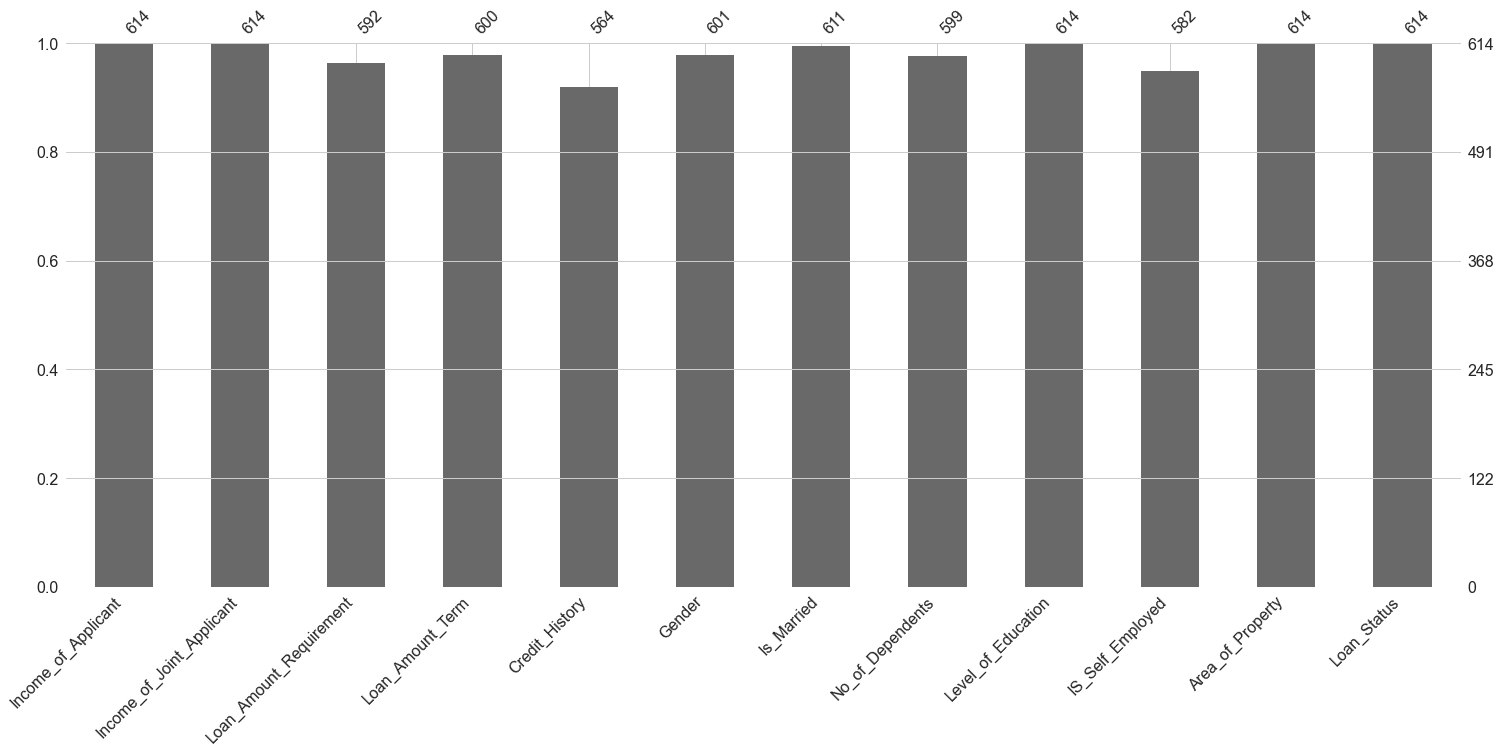

In [12]:
#Step 9: Get missing values
msno.bar(Loan_Data)

In [13]:
Loan_Data.isnull().sum()

Income_of_Applicant           0
Income_of_Joint_Applicant     0
Loan_Amount_Requirement      22
Loan_Amount_Term             14
Credit_History               50
Gender                       13
Is_Married                    3
No_of_Dependents             15
Level_of_Education            0
IS_Self_Employed             32
Area_of_Property              0
Loan_Status                   0
dtype: int64

# Data Preprocessing

As Model takes only numerical values, as part of Data Transformation;

Label Encoding was performed on following features- Gender, IS_Self_Employed,Is_Married,No_of_Dependents,Loan_Status, Level_of_Education

One Hot Encoding was performed on Area_of_Property as in case of more categorical variables one hot encoding is preferred

# Data Transformation and Handling Missing Outliers

In [14]:
# label_encoder object knows how to understand word labels. 
# Encode labels in column 'Gender'. 

print(Loan_Data['Gender'].value_counts())
label_encoder = preprocessing.LabelEncoder()
Loan_Data['Gender']= label_encoder.fit_transform(Loan_Data['Gender'])
Loan_Data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64


1    489
0    112
2     13
Name: Gender, dtype: int64

NOTE: '2' value as label is null values that 'gender' column had which is handled later 

In [15]:
# Encode labels in column 'IS_Self_Employed'

print(Loan_Data['IS_Self_Employed'].value_counts())
label_encoder = preprocessing.LabelEncoder()
Loan_Data['IS_Self_Employed']= label_encoder.fit_transform(Loan_Data['IS_Self_Employed'])
Loan_Data['IS_Self_Employed'].value_counts()

No     500
Yes     82
Name: IS_Self_Employed, dtype: int64


0    500
1     82
2     32
Name: IS_Self_Employed, dtype: int64

NOTE: '2' value as label is null values that 'IS_Self_Employed' column had which is handled later 

In [16]:
# Encode labels in column 'Is_Married'

print(Loan_Data['Is_Married'].value_counts())
label_encoder = preprocessing.LabelEncoder()
Loan_Data['Is_Married']= label_encoder.fit_transform(Loan_Data['Is_Married']) 
Loan_Data['Is_Married'].value_counts()

Yes    398
No     213
Name: Is_Married, dtype: int64


1    398
0    213
2      3
Name: Is_Married, dtype: int64

In [17]:
# Encode labels in column 'Loan_Status'

print(Loan_Data['Loan_Status'].value_counts())
label_encoder = preprocessing.LabelEncoder()
Loan_Data['Loan_Status']= label_encoder.fit_transform(Loan_Data['Loan_Status'])
Loan_Data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64


1    422
0    192
Name: Loan_Status, dtype: int64

In [18]:
# Encode labels in column 'Level_of_Education'

print(Loan_Data['Level_of_Education'].value_counts())
label_encoder = preprocessing.LabelEncoder()
Loan_Data['Level_of_Education']= label_encoder.fit_transform(Loan_Data['Level_of_Education'])
Loan_Data['Level_of_Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Level_of_Education, dtype: int64


0    480
1    134
Name: Level_of_Education, dtype: int64

In [19]:
#One Hot Encoding on Area of Property column

print(Loan_Data['Area_of_Property'].value_counts())
Loan_Data= pd.get_dummies(data=Loan_Data, columns=['Area_of_Property'])


Semiurban    233
Urban        202
Rural        179
Name: Area_of_Property, dtype: int64


In [20]:
#Convert  categorical data to numeric

print(Loan_Data['No_of_Dependents'].value_counts())
Loan_Data.No_of_Dependents=Loan_Data.No_of_Dependents.replace({0:0,1:1, 2:2,"3+":3})
Loan_Data['No_of_Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: No_of_Dependents, dtype: int64


0    345
1    102
2    101
3     51
Name: No_of_Dependents, dtype: int64

In [21]:
Loan_Data.isnull().sum()

Income_of_Applicant            0
Income_of_Joint_Applicant      0
Loan_Amount_Requirement       22
Loan_Amount_Term              14
Credit_History                50
Gender                         0
Is_Married                     0
No_of_Dependents              15
Level_of_Education             0
IS_Self_Employed               0
Loan_Status                    0
Area_of_Property_Rural         0
Area_of_Property_Semiurban     0
Area_of_Property_Urban         0
dtype: int64

Null Values in Credit_History column will be handled ater checking correlation matrix

Get Correlation Matrix to understand correlation of input features on dependent variable Loan_Status

#  Correlation matrix

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender,Is_Married,Level_of_Education,IS_Self_Employed,Loan_Status,Area_of_Property_Rural,Area_of_Property_Semiurban,Area_of_Property_Urban
Income_of_Applicant,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.094472,0.052119,-0.140760,0.095664,-0.004710,0.015829,-0.014246,-0.000598
Income_of_Joint_Applicant,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.073308,0.069877,-0.062290,0.052218,-0.059187,0.005329,-0.027044,0.022776
Loan_Amount_Requirement,0.570909,0.188619,1.000000,0.039447,-0.008433,0.137736,0.148922,-0.171133,0.091348,-0.037318,0.043942,-0.008401,-0.034003
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.068536,-0.097345,-0.078784,-0.037492,-0.021268,0.034827,0.061957,-0.098112
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.000515,0.010690,-0.081822,0.056894,0.561678,-0.020983,0.042414,-0.023721
Gender,0.094472,0.073308,0.137736,-0.068536,-0.000515,1.000000,0.336094,0.024382,-0.025022,0.008690,0.075359,-0.091046,0.021140
Is_Married,0.052119,0.069877,0.148922,-0.097345,0.010690,0.336094,1.000000,0.006759,-0.038153,0.096657,-0.013153,0.011709,0.000629
Level_of_Education,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,0.024382,0.006759,1.000000,-0.021130,-0.085884,0.077520,-0.039410,-0.034279
IS_Self_Employed,0.095664,0.052218,0.091348,-0.037492,0.056894,-0.025022,-0.038153,-0.021130,1.000000,0.010880,0.023049,-0.021382,-0.000211
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,0.008690,0.096657,-0.085884,0.010880,1.000000,-0.100694,0.136540,-0.043621


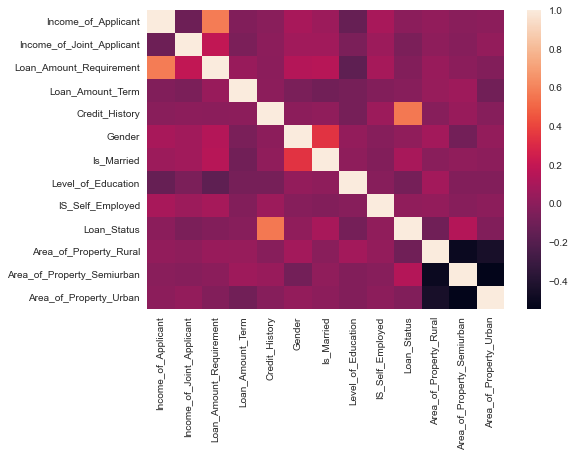

In [22]:
#Plot correlation matrix and table

Correlation = sns.heatmap(Loan_Data.corr())
Loan_Data.corr()

In [23]:

Loan_Data.drop(Loan_Data[Loan_Data['Gender'] == 2].index, inplace = True)
print(Loan_Data['Gender'].value_counts())
Loan_Data.drop(Loan_Data[Loan_Data['IS_Self_Employed'] == 2].index, inplace = True)
print(Loan_Data['IS_Self_Employed'].value_counts())

1    489
0    112
Name: Gender, dtype: int64
0    491
1     78
Name: IS_Self_Employed, dtype: int64


In [24]:
#dropping rows with missing values
Loan_Data.dropna(subset=['No_of_Dependents'], inplace=True)

For Gender and IS_Self_Employed '2' was assigned while label encoding as they are less than 30 rows these rows could be dropped


Credit History is highly correlated with Loan_Status so null values will be assigned to new class as 2 and should be analysed  

In [25]:
#Credit History Nan is replaced with constant 2 vlue and assigned a new class

Loan_Data['Credit_History'].fillna(2,inplace=True)

In [26]:
Loan_Data['Credit_History'].value_counts()

1.0    431
0.0     80
2.0     43
Name: Credit_History, dtype: int64

In [27]:
Loan_Data.isnull().sum()

Income_of_Applicant            0
Income_of_Joint_Applicant      0
Loan_Amount_Requirement       19
Loan_Amount_Term              12
Credit_History                 0
Gender                         0
Is_Married                     0
No_of_Dependents               0
Level_of_Education             0
IS_Self_Employed               0
Loan_Status                    0
Area_of_Property_Rural         0
Area_of_Property_Semiurban     0
Area_of_Property_Urban         0
dtype: int64

# Dealing with Outliers

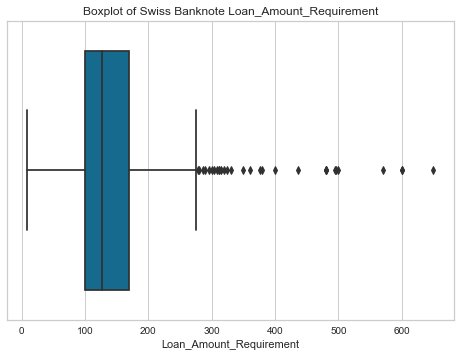

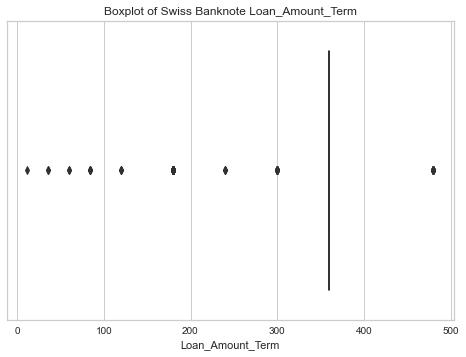

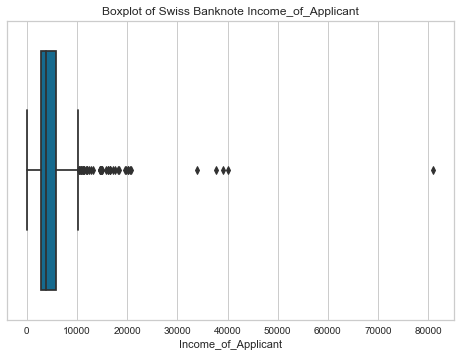

In [28]:
#Display box plot of numerical columns

def boxplot(column):
    sns.boxplot(data=Loan_Data,x=Loan_Data[f"{column}"])
    plt.title(f"Boxplot of Swiss Banknote {column}")
    plt.show()
boxplot('Loan_Amount_Requirement')
boxplot('Loan_Amount_Term')
boxplot('Income_of_Applicant')

In [29]:
#Get median and mean of Loan_Amount_Requirement and Loan_Amount_Term to deal with missing values

print(Loan_Data['Loan_Amount_Requirement'].mean())
print(Loan_Data['Loan_Amount_Requirement'].median())
print(Loan_Data['Loan_Amount_Term'].mean())
print(Loan_Data['Loan_Amount_Term'].median())

144.9177570093458
127.0
341.95571955719555
360.0


Null Values in Loan Amount Requirement and Loan Amount Term will be replaced with median values as these columns had outlier values and mean is not appropriate

In [30]:
#Replace NaN in Loan_Amount_Requirement and Loan _Amount_Term is replaced with median values 

Loan_Data['Loan_Amount_Requirement'].fillna(Loan_Data['Loan_Amount_Requirement'].median(), inplace = True)
Loan_Data['Loan_Amount_Term'].fillna(Loan_Data['Loan_Amount_Term'].median(), inplace = True)

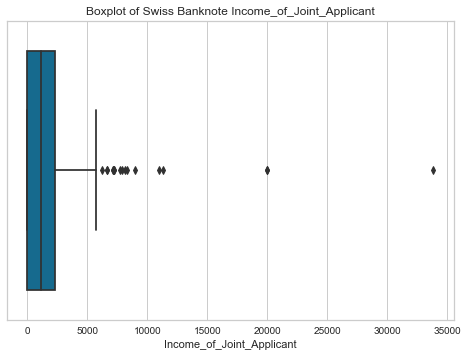

In [31]:
#Display boxplot of Income Joint Applicant

def boxplot(column):
    sns.boxplot(data=Loan_Data,x=Loan_Data[f"{column}"])
    plt.title(f"Boxplot of Swiss Banknote {column}")
    plt.show()

boxplot('Income_of_Joint_Applicant')

In [32]:
#Get min,max, iqr of Income Joint Applicant and deal with outliers

for i in ['Income_of_Joint_Applicant']:
    q3, q1 = np.percentile(Loan_Data.loc[: , 'Income_of_Joint_Applicant'],[75,25])
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    print(min,max,q3,q1,iqr)
    outliers = [i for i in Loan_Data['Income_of_Joint_Applicant'] if i < min or i > max]
    print('The following are the outliers in the Income_of_Joint_Applicant:{}' ,outliers)
    Loan_Data.loc[Loan_Data[i] < min, i] = np.nan
    Loan_Data.loc[Loan_Data[i] > max, i] = np.nan
    
    print(len(Loan_Data.loc[Loan_Data[i] < min, i]))
    print(len(Loan_Data.loc[Loan_Data[i] > max, i]))
outliers = [i for i in Loan_Data['Income_of_Joint_Applicant'] if i < min or i > max]
print('The following are the outliers in the Income_of_Joint_Applicant:{}' ,outliers)

    

-3445.875 5743.125 2297.25 0.0 2297.25
The following are the outliers in the Income_of_Joint_Applicant:{} [10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0]
0
0
The following are the outliers in the Income_of_Joint_Applicant:{} []


Income of Applicant, Loan Term Requirement and Loan Amount Term have outliers but cannot be removed as these outliers as valid and income of people can be genuinely different.
Income of Joint Application has 17 outliers and can be removed and replaced

In [33]:
Loan_Data['Income_of_Joint_Applicant'].isnull().sum()

17

In [34]:
#Get Mean and Median of Income Joint Applicant

print(Loan_Data['Income_of_Joint_Applicant'].mean())
print(Loan_Data['Income_of_Joint_Applicant'].median())


1290.413258824283
1030.0


In [35]:
#Replace with MEdian

Loan_Data['Income_of_Joint_Applicant'].fillna(Loan_Data['Income_of_Joint_Applicant'].median(), inplace = True)

In [36]:
Loan_Data.head()

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Loan_Status,Area_of_Property_Rural,Area_of_Property_Semiurban,Area_of_Property_Urban
0,5849,0.0,127.0,360.0,1.0,1,0,0,0,0,1,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [37]:
Loan_Data.isnull().sum()

Income_of_Applicant           0
Income_of_Joint_Applicant     0
Loan_Amount_Requirement       0
Loan_Amount_Term              0
Credit_History                0
Gender                        0
Is_Married                    0
No_of_Dependents              0
Level_of_Education            0
IS_Self_Employed              0
Loan_Status                   0
Area_of_Property_Rural        0
Area_of_Property_Semiurban    0
Area_of_Property_Urban        0
dtype: int64

In [38]:
Loan_Data.shape

(554, 14)

In [39]:
#Split data into dependent and independent Variables (X and y)

X=Loan_Data.drop(['Loan_Status'],axis=1)
y=Loan_Data['Loan_Status']

# Handlilng Imbalance DataSet using SMOTE technique

As this is loan dataset, critical data and has only400+ rows , if we do undersample then data will be lost and dataset will become small so oversample is done here

In [40]:
oversample = SMOTE(random_state=1)
X,y=oversample.fit_resample(X,y)
y.value_counts()

1    382
0    382
Name: Loan_Status, dtype: int64

In [41]:
X.shape

(764, 13)

# Model Building and Evaluation

### 1. Decision Tree Algorithm

In [42]:
X1, X2, y1, y2 = train_test_split(X, y, test_size = 0.2, random_state =6)
#Split the data in train test 

In [43]:
#Create object of class Decision Tree and fit train data to a object and pass test data to that object

clf=DecisionTreeClassifier() #create object of DT class
cl_predict=clf.fit(X1,y1) #training of data
predictions=cl_predict.predict(X2) #predict on test data
print("Accuracy:",accuracy_score(y2,predictions)) #accuracy


Accuracy: 0.7777777777777778


In [44]:
#confusion Matrix

confusionmatrix=metrics.confusion_matrix(y2, predictions)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

#tn, fp, fn, tp = confusion_matrix returns values in this sequence

print("True Positive cases=",TP)
print("True Negative cases=",TN)
print("False Positive cases=",FP)
print("False Negative cases=",FN)
Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

[[59 11]
 [23 60]]
True Positive cases= 60
True Negative cases= 59
False Positive cases= 11
False Negative cases= 23
Total positive cases= 83
Total negative cases= 70


In [48]:
print("-----------------")
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy=",accuracy_score(y2, predictions))


#Sensitivity is also called as Recall or True Positive Rate 
#sensitivity is nothing but out of total positive cases how many  are correctly predicted as positive
print("-----------------")
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)


#specificity is nothing but out of total negative predictions how many are correctly predicted as negative
print("-----------------")
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)


#precision is nothing but out of total positive predictions how many are true postive
print("-----------------")
precision=TP/(TP+FP)
print("precision=", precision)


#False Positive Rate is nothing but out of total negative cases how many are incorrectly predicted as positive
print("-----------------")
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)


#False Negative Rate is nothing but out of total positive cases how many are incorrectly predicted as negative
print("-----------------")
FNR=FN/Total_Positive_Cases
print("FNR=", FNR)

print(1-sensitivity)



print("-----------------")
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print('Weighted_TPR_TNR',Weighted_TPR_TNR)

-----------------
accuracy= 0.7777777777777778
-----------------
sensitivity= 0.7228915662650602
-----------------
specificity= 0.8428571428571429
-----------------
precision= 0.8450704225352113
-----------------
FPR= 0.15714285714285714
-----------------
FNR= 0.27710843373493976
0.27710843373493976
-----------------
Weighted_TPR_TNR 0.7879709313444253


In [52]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver= 'lbfgs', max_iter=1000)
clf = clf.fit(X1, y1)
predictions1=clf.predict(X2)
print("Prediction for Decision Tree: ",predictions1)
print("Accuracy:",accuracy_score(y2,predictions1))

Prediction for Decision Tree:  [0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0
 0 1 1 0 1]
Accuracy: 0.7647058823529411


In [53]:
#confusion Matrix

confusionmatrix=metrics.confusion_matrix(y2, predictions1)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

#tn, fp, fn, tp = confusion_matrix returns values in this sequence

print("True Positive cases=",TP)
print("True Negative cases=",TN)
print("False Positive cases=",FP)
print("False Negative cases=",FN)
Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

[[54 16]
 [20 63]]
True Positive cases= 63
True Negative cases= 54
False Positive cases= 16
False Negative cases= 20
Total positive cases= 83
Total negative cases= 70


In [55]:
print("-----------------")
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy=",accuracy_score(y2, predictions1))


#Sensitivity is also called as Recall or True Positive Rate 
#sensitivity is nothing but out of total positive cases how many  are correctly predicted as positive
print("-----------------")
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)


#specificity is nothing but out of total negative predictions how many are correctly predicted as negative
print("-----------------")
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)


#precision is nothing but out of total positive predictions how many are true postive
print("-----------------")
precision=TP/(TP+FP)
print("precision=", precision)


#False Positive Rate is nothing but out of total negative cases how many are incorrectly predicted as positive
print("-----------------")
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)


#False Negative Rate is nothing but out of total positive cases how many are incorrectly predicted as negative
print("-----------------")
FNR=FN/Total_Positive_Cases
print("FNR=", FNR)
print(1-sensitivity)



print("-----------------")
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print('Weighted_TPR_TNR',Weighted_TPR_TNR)

-----------------
accuracy= 0.7647058823529411
-----------------
sensitivity= 0.7590361445783133
-----------------
specificity= 0.7714285714285715
-----------------
precision= 0.7974683544303798
-----------------
FPR= 0.22857142857142856
-----------------
FNR= 0.24096385542168675
0.24096385542168675
-----------------
Weighted_TPR_TNR 0.7657588336539435


In [56]:
#using k nearest neighbour classfier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X1, y1)
predictions2=clf.predict(X2)
print("Prediction for KNN : ",predictions2)
print("Accuracy:",accuracy_score(y2,predictions2))

Prediction for KNN :  [0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 0 1 0 1 1]
Accuracy: 0.6666666666666666


In [57]:
#confusion Matrix

confusionmatrix=metrics.confusion_matrix(y2, predictions2)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

#tn, fp, fn, tp = confusion_matrix returns values in this sequence

print("True Positive cases=",TP)
print("True Negative cases=",TN)
print("False Positive cases=",FP)
print("False Negative cases=",FN)
Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

[[50 20]
 [31 52]]
True Positive cases= 52
True Negative cases= 50
False Positive cases= 20
False Negative cases= 31
Total positive cases= 83
Total negative cases= 70


In [58]:
print("-----------------")
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy=",accuracy_score(y2, predictions2))


#Sensitivity is also called as Recall or True Positive Rate 
#sensitivity is nothing but out of total positive cases how many  are correctly predicted as positive
print("-----------------")
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)


#specificity is nothing but out of total negative predictions how many are correctly predicted as negative
print("-----------------")
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)


#precision is nothing but out of total positive predictions how many are true postive
print("-----------------")
precision=TP/(TP+FP)
print("precision=", precision)


#False Positive Rate is nothing but out of total negative cases how many are incorrectly predicted as positive
print("-----------------")
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)


#False Negative Rate is nothing but out of total positive cases how many are incorrectly predicted as negative
print("-----------------")
FNR=FN/Total_Positive_Cases
print("FNR=", FNR)
print(1-sensitivity)



print("-----------------")
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print('Weighted_TPR_TNR',Weighted_TPR_TNR)

-----------------
accuracy= 0.6666666666666666
-----------------
sensitivity= 0.6265060240963856
-----------------
specificity= 0.7142857142857143
-----------------
precision= 0.7222222222222222
-----------------
FPR= 0.2857142857142857
-----------------
FNR= 0.37349397590361444
0.37349397590361444
-----------------
Weighted_TPR_TNR 0.6741250717154331


In [59]:
#Using Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(X1, y1)
predictions3=clf.predict(X2)
print("Prediction for Decision Tree: ",predictions3)
print("Accuracy:",accuracy_score(y2,predictions3))

Prediction for Decision Tree:  [0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0
 0 1 1 0 0]
Accuracy: 0.7647058823529411


In [60]:
#confusion Matrix

confusionmatrix=metrics.confusion_matrix(y2, predictions3)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

#tn, fp, fn, tp = confusion_matrix returns values in this sequence

print("True Positive cases=",TP)
print("True Negative cases=",TN)
print("False Positive cases=",FP)
print("False Negative cases=",FN)
Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

[[48 22]
 [14 69]]
True Positive cases= 69
True Negative cases= 48
False Positive cases= 22
False Negative cases= 14
Total positive cases= 83
Total negative cases= 70


In [61]:
print("-----------------")
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy=",accuracy_score(y2, predictions3))


#Sensitivity is also called as Recall or True Positive Rate 
#sensitivity is nothing but out of total positive cases how many  are correctly predicted as positive
print("-----------------")
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)


#specificity is nothing but out of total negative predictions how many are correctly predicted as negative
print("-----------------")
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)


#precision is nothing but out of total positive predictions how many are true postive
print("-----------------")
precision=TP/(TP+FP)
print("precision=", precision)


#False Positive Rate is nothing but out of total negative cases how many are incorrectly predicted as positive
print("-----------------")
FPR=FP/Total_Negative_Cases
print("FPR=", FPR)


#False Negative Rate is nothing but out of total positive cases how many are incorrectly predicted as negative
print("-----------------")
FNR=FN/Total_Positive_Cases
print("FNR=", FNR)
print(1-sensitivity)



print("-----------------")
Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print('Weighted_TPR_TNR',Weighted_TPR_TNR)

-----------------
accuracy= 0.7647058823529411
-----------------
sensitivity= 0.8313253012048193
-----------------
specificity= 0.6857142857142857
-----------------
precision= 0.7582417582417582
-----------------
FPR= 0.3142857142857143
-----------------
FNR= 0.1686746987951807
0.1686746987951807
-----------------
Weighted_TPR_TNR 0.7523337045661638


Accuracy and Weighted_TPR_TNR Ranking in order of algorithms:
Decision Tree > Logistic Regression > Naive Bayes > K nearest neighbour

#### --------------------------------------------------------------------------------------------

# Problem Statement 2 - Clustering

## Hierarchical Clustering

In [62]:
#Step 1: read the data
cardata=pd.read_csv("Clustering_cardata.csv")

In [63]:
#Step 2: Get shape and type of input data and and display top 5 rows
print(cardata.shape)     #number of rows and columns
print(cardata.dtypes)    #type of variables
cardata.head(5)

(25, 18)
Resp.Id                            int64
Indian Technlogy high order        int64
Buy Made in India                  int64
Value for money                    int64
Convenience over style             int64
Don't do waste full expenditure    int64
No compromise on safety            int64
Saver not spender                  int64
Try new things                     int64
Be part of a changing world        int64
Purchase Intentions                int64
Occupation                         int64
Family income                      int64
Family size                        int64
Marital Status                     int64
Education                          int64
Age                                int64
Nature of Job                      int64
dtype: object


,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [30.0, 30.0, 45.0, 45.0],
  [10.0, 10.0, 37.5, 37.5],
  [55.0, 55.0, 65.0, 65.0],
  [60.0, 60.0, 75.0, 75.0],
  [67.5, 67.5, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [76.25, 76.25, 100.0, 100.0],
  [23.75, 23.75, 88.125, 88.125],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [55.9375, 55.9375, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [160.0, 160.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [167.5, 167.5, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [230.0, 230.0, 245.0, 245.0],
  [183.75, 183.75, 237.5, 237.5],
  [92.96875, 92.96875, 210.625, 210.625]],
 'dcoord': [[0.0, 6.48074069840786, 6.48074069840786, 0.0],
  [0.0, 3.3166247903554, 3.3166247903554, 0.0],
  [3.3166247903554, 5.11971497222411, 5.11971497222411, 0.0],
  [6.48074069840786, 7.569861610559274, 7.569861610559274, 5.1197

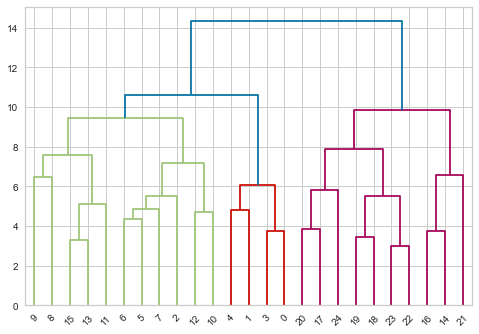

In [64]:
#Step 3: Euclidean distance is calculated for initial distance matrix and average linkage method to merge clusters iterativelyt 
#Step 4: dendogram is plotted

linked1 = linkage(cardata, 'average','euclidean')
dendrogram(linked1, orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)   

#### As per above, we can see 3 clusters can be formed so n_clusters value is assigned to 3 as per my assumption

In [65]:
#Step 5:object is created with the parameters and then data is fitted to the model and each data point is assigned to cluster

cl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cl_label=cl.fit_predict(cardata)
print(cl_label)

[2 2 1 2 2 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0]


In [66]:
#Step 6:Create new dataset by merging predicted cluster label with origional data

clwithcluster=pd.concat([cardata,pd.Series(cl_label)],axis=1)
clwithcluster.head(5)

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,0
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,2
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,1
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,2
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2


In [67]:
#Step 7: New dataset had cluster label column unnamed so label new column

clwithcluster.columns=['Resp.Id',
 'Indian Technlogy high order',
 'Buy Made in India',
 'Value for money',
 'Convenience over style',
 'Dont do waste full expenditure',
 'No compromise on safety',
 'Saver not spender',
 'Try new things',
 'Be part of a changing world',
 'Purchase Intentions',
 'Occupation','Family income','Family size','Marital Status','Education','Age','Nature of Job',"clusterLabel"]
clwithcluster.head(5)

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Dont do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,clusterLabel
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,2
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,1
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,2
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2


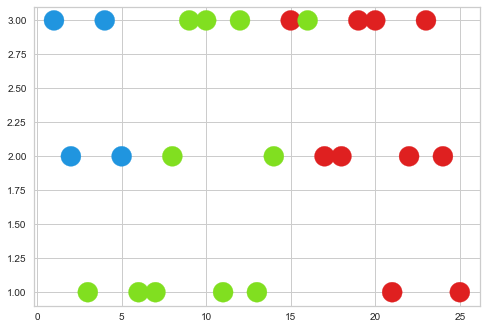

In [68]:
colors = ['#DF2020', '#81DF20', '#2095DF']
clwithcluster['c'] = clwithcluster.clusterLabel.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(clwithcluster["Resp.Id"],clwithcluster["Age"],c=clwithcluster.c, alpha = 1, s=400)

In [69]:
#Step 8: Calculate mean of each cluster column wise

car=clwithcluster.groupby(by='clusterLabel')
car.mean()

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Dont do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
clusterLabel,,,,,,,,,,,,,,,,,,
0,20.400000,2.900000,3.000000,3.0,2.900000,2.900000,2.700000,2.700000,2.300000,2.2,0.500000,2.000000,3.000000,2.400000,1.500000,3.000000,2.200000,1.300000
1,9.909091,2.818182,2.909091,2.0,2.090909,1.818182,1.909091,1.636364,3.181818,3.0,0.454545,2.090909,2.454545,2.090909,1.454545,3.181818,1.909091,1.545455
2,3.000000,3.750000,3.750000,4.0,3.250000,3.500000,4.250000,3.750000,1.500000,1.5,0.500000,2.000000,3.500000,2.000000,1.500000,3.000000,2.500000,1.000000


In [70]:
#Step 9:Check how may data points belong to each cluster

clwithcluster["clusterLabel"].value_counts()

1    11
0    10
2     4
Name: clusterLabel, dtype: int64

In [71]:
#Step 10:Sort the data based on cluster label variable and store it in another variable

sorteddata=clwithcluster.sort_values(by=['clusterLabel'])
sorteddata 

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Dont do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,clusterLabel,c
24,25,2,3,2,2,1,1,1,5,4,1,2,4,2,1,3,1,1,0,#DF2020
22,23,4,4,2,2,2,3,4,1,2,1,2,4,3,2,3,3,1,0,#DF2020
21,22,2,1,5,5,5,5,4,1,1,0,2,2,3,2,3,2,3,0,#DF2020
20,21,2,2,1,2,1,1,1,5,5,1,2,4,1,1,3,1,1,0,#DF2020
19,20,4,4,2,1,3,2,1,1,2,0,2,3,3,2,3,3,1,0,#DF2020
18,19,4,5,3,3,3,2,2,1,1,1,2,3,2,1,3,3,1,0,#DF2020
17,18,2,3,2,2,1,1,1,5,4,1,2,3,2,1,3,2,1,0,#DF2020
16,17,2,1,5,5,5,4,5,1,1,0,3,2,2,2,3,2,1,0,#DF2020
14,15,3,2,5,5,5,5,4,2,1,0,2,1,3,2,3,3,2,0,#DF2020
23,24,4,5,3,2,3,3,4,1,1,0,1,4,3,1,3,2,1,0,#DF2020


In [72]:
#Step 11:Export data to csv

sorteddata.to_csv("HierarchicalClustering.csv")

In [73]:
#Step 12:Display Data

sorteddata

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Dont do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,clusterLabel,c
24,25,2,3,2,2,1,1,1,5,4,1,2,4,2,1,3,1,1,0,#DF2020
22,23,4,4,2,2,2,3,4,1,2,1,2,4,3,2,3,3,1,0,#DF2020
21,22,2,1,5,5,5,5,4,1,1,0,2,2,3,2,3,2,3,0,#DF2020
20,21,2,2,1,2,1,1,1,5,5,1,2,4,1,1,3,1,1,0,#DF2020
19,20,4,4,2,1,3,2,1,1,2,0,2,3,3,2,3,3,1,0,#DF2020
18,19,4,5,3,3,3,2,2,1,1,1,2,3,2,1,3,3,1,0,#DF2020
17,18,2,3,2,2,1,1,1,5,4,1,2,3,2,1,3,2,1,0,#DF2020
16,17,2,1,5,5,5,4,5,1,1,0,3,2,2,2,3,2,1,0,#DF2020
14,15,3,2,5,5,5,5,4,2,1,0,2,1,3,2,3,3,2,0,#DF2020
23,24,4,5,3,2,3,3,4,1,1,0,1,4,3,1,3,2,1,0,#DF2020


#### Cluster 0 - Middle Age Commoner 

Demophraphic details: Maximum people of this cluster has PRIVATE JOBS and have completed their GRADUATION. People of this clustr has DESK JOBS and belong to th AGE GROUP of 31-50. 
Survey Commonalities: People are equally inclined in rejecting and accepting Indian technology and similar behaviour is observed in Trying out new things. Other features are bit more dispersed. This cluster represents - "Commoner who does not spend carelessly and purchase according to their needs.

#### Cluster 1 - Trendy Youth and Middle Age Elite

Demophraphic details: Maximum people of this cluster has PRIVATE JOBS and have completed their GRADUATION. People of this clustr has DESK JOBS and belong to th AGE GROUP of 21-30 and 41-50 years. Mostly people live in nuclear family of this cluster. People of this class are well aware and educated.
Survey Commonalities: People of this cluster preferes STYLE over CONVENIENCE and like to go with TREND. People of this class are ready to spend. This cluster represents - "GenZ youths with few middle age elites living in nuclear family living a lavish lifstyle"

#### Cluster 2 - Smart Elderly

Demophraphic details: Small cluster having high common features. They have PRIVATE JOBS and have completed EDUCATION. Family income is greater than 2 lakhs. They belong to MIDDLE AGED GROUP.  
Survey Commonalities: People adre SAVERS and won't spend casually. They are well aware and reasonable to prefer SAFETY. They live in nuclear family and prefers INDIAN TECHNOLOGY products over other products. This cluster represents - Well aware and experienced, with high income but smart" 

## K-means clustering

In [74]:
#Step 1: Read the data
car1=pd.read_csv("Clustering_cardata.csv")

In [75]:
#Step 2: create 3 clusters using K-means technique

clmodel=KMeans(n_clusters=3,random_state=100)
clmodel.fit(car1)

KMeans(n_clusters=3, random_state=100)

In [76]:
#Step 3: Predict cluster label of data points

Labels=clmodel.predict(car1)

In [77]:
#Step 4: Print Cluster Lables
print(type(Labels))
Labels

<class 'numpy.ndarray'>


array([2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [78]:
#Step 5: Get Cluster centres for each column attribute of 3 clusters

clmodel.cluster_centers_

array([[19.5       ,  3.16666667,  3.33333333,  2.83333333,  2.75      ,
         2.83333333,  2.58333333,  2.41666667,  2.08333333,  2.        ,
         0.58333333,  2.        ,  3.        ,  2.33333333,  1.41666667,
         3.        ,  2.25      ,  1.25      ],
       [ 8.57142857,  2.42857143,  2.28571429,  1.57142857,  1.71428571,
         1.28571429,  1.42857143,  1.14285714,  4.28571429,  4.        ,
         0.28571429,  2.14285714,  2.28571429,  2.14285714,  1.57142857,
         3.28571429,  1.42857143,  1.85714286],
       [ 5.16666667,  3.33333333,  3.5       ,  3.83333333,  3.33333333,
         3.33333333,  4.        ,  3.83333333,  1.5       ,  1.5       ,
         0.5       ,  2.        ,  3.16666667,  2.        ,  1.5       ,
         3.        ,  2.66666667,  1.        ]])

In [79]:
#Step 6: Concat Input data with predicted cluster labels and store it in a variable

newcardata=pd.concat([car1,pd.Series(Labels)],axis=1)
print(newcardata.columns)
newcardata.head()

Index([                        'Resp.Id',     'Indian Technlogy high order',
                     'Buy Made in India',                 'Value for money',
                'Convenience over style', 'Don't do waste full expenditure',
               'No compromise on safety',               'Saver not spender',
                        'Try new things',     'Be part of a changing world',
                   'Purchase Intentions',                      'Occupation',
                         'Family income',                     'Family size',
                        'Marital Status',                       'Education',
                                   'Age',                   'Nature of Job',
                                       0],
      dtype='object')


,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,0
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,2
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,1
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,2
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2


In [80]:
#Step 7: Rename ClusterLabel column

newcardata.columns=['Resp.Id',
 'Indian Technlogy high order',
 'Buy Made in India',
 'Value for money',
 'Convenience over style',
 'Dont do waste full expenditure',
 'No compromise on safety',
 'Saver not spender',
 'Try new things',
 'Be part of a changing world',
 'Purchase Intentions',
 'Occupation','Family income','Family size','Marital Status','Education','Age','Nature of Job',"clusterLabel"]
newcardata.head(5)

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Dont do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,clusterLabel
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,2
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,1
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,2
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2


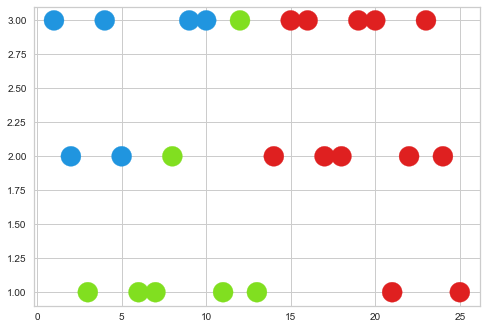

In [81]:
colors = ['#DF2020', '#81DF20', '#2095DF']
newcardata['c'] = newcardata.clusterLabel.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(newcardata["Resp.Id"],newcardata["Age"],c=newcardata.c, alpha = 1, s=400)

In [82]:
#Step 8: Sort the new dataset with predicted clusters based on cluster numbers 

print(newcardata["clusterLabel"].value_counts())
sorteddata=newcardata.sort_values(by=['clusterLabel'])
sorteddata 


0    12
1     7
2     6
Name: clusterLabel, dtype: int64


,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Dont do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,clusterLabel,c
24,25,2,3,2,2,1,1,1,5,4,1,2,4,2,1,3,1,1,0,#DF2020
22,23,4,4,2,2,2,3,4,1,2,1,2,4,3,2,3,3,1,0,#DF2020
21,22,2,1,5,5,5,5,4,1,1,0,2,2,3,2,3,2,3,0,#DF2020
20,21,2,2,1,2,1,1,1,5,5,1,2,4,1,1,3,1,1,0,#DF2020
19,20,4,4,2,1,3,2,1,1,2,0,2,3,3,2,3,3,1,0,#DF2020
18,19,4,5,3,3,3,2,2,1,1,1,2,3,2,1,3,3,1,0,#DF2020
17,18,2,3,2,2,1,1,1,5,4,1,2,3,2,1,3,2,1,0,#DF2020
16,17,2,1,5,5,5,4,5,1,1,0,3,2,2,2,3,2,1,0,#DF2020
15,16,4,5,2,2,3,1,1,1,1,1,2,3,2,1,3,3,1,0,#DF2020
14,15,3,2,5,5,5,5,4,2,1,0,2,1,3,2,3,3,2,0,#DF2020


In [83]:
#Step 9:  export sorted  it to csv
sorteddata.to_csv("kmeans.csv")

#### Cluster 0 - Elite Middle Age 

The common characteristics of this cluster are that they don't mind spending money on style, that they have private jobs with moderate to high incomes, and that they have nuclear and big families. All have bachelor's degrees, have desk jobs, and are middle aged people. Thus, according to my perspective, this cluster signifies "people who live a luxury lifestyle and come from well-to-do families."

#### Cluster 1 - Struggling Youth 

The common characteristics of this cluster are that they are all young, have desk jobs, and the majority have graduate and post-graduate degrees. They don't mind spending money on style, but they have a restricted budget right now. Thus, this cluster, in my opinion, depicts "those who are now young but don't have enough money to spend but will soon be earning and spending well."

#### Cluster 2 -  Middle Aged Commoner

This cluster has private jobs, a high family income, believes in saving, has graduate degrees and desk jobs, and are consists of middle-aged people. As a result, according to my perspective, this cluster reflects "smart purchasers from migrating nuclear families who would spend but prudently."

#### --------------------------------------------------------------------------------------------

# Problem 3 – Association rule mining : Market Basket

In [84]:
#Step 1: Read the data

grocApr=pd.read_csv("Association_Rule_Mining_Data.csv")

In [85]:
#Step 2: Display top 5 rows

grocApr.head()

,Row Labels,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,6468572,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6486475,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,6504964,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,6529569,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,6549521,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Step 3: Check for null values

grocApr.isnull().sum()

Row Labels                    0
Almonds                       0
Poha                          0
Banana                        0
Beans                         0
Besan                         0
Boiled Rice                   0
Bread                         0
Brinjals                      0
Buns & Pavs                   0
Cakes                         0
Cashews                       0
Chips                         0
Cookies                       0
Corn Snacks                   0
Cream Biscuits                0
Eggs                          0
Ghee                          0
Gourd & Cucumber              0
Ground Coffee                 0
Hair Oil                      0
Health Drinks                 0
Healthy Snacks                0
Instant Noodles               0
Jaggery                       0
Liquid Soaps & Bars           0
Moong Dal                     0
Mosquito Repellent            0
Namkeen                       0
Organic F&V                   0
Other Dals                    0
Other Dr

In [89]:
#Step 4: Replace null values with 0

grocApr=grocApr.fillna(0)

In [90]:
grocApr

,Row Labels,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,6468572,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6486475,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,6504964,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6529569,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,6549521,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6562518,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,6596905,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,6612806,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6624000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,6638454,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [91]:
#Step 5: Drop row labels colums as it is not mandatory

grocApr = grocApr.drop('Row Labels', axis = 1)

In [92]:
#Step 6: for all columns check if any column has values other than 0 and 1

for col in grocApr:
    print(col,grocApr[col].unique())

Almonds [0. 1.]
Poha [0. 1.]
Banana [1. 0.]
Beans [0. 1.]
Besan [0. 1.]
Boiled Rice [0. 1.]
Bread [0. 1.]
Brinjals [0. 1.]
Buns & Pavs [0. 1.]
Cakes [0. 1.]
Cashews [1. 0.]
Chips [0. 1.]
Cookies [0. 1.]
Corn Snacks [0. 1.]
Cream Biscuits [0. 1.]
Eggs [0. 1.]
Ghee [0. 1.]
Gourd & Cucumber [0. 1.]
Ground Coffee [0. 1.]
Hair Oil [0. 1.]
Health Drinks [0. 1.]
Healthy Snacks [0. 1.]
Instant Noodles [0. 1.]
Jaggery [0. 1.]
Liquid Soaps & Bars [0. 1.]
Moong Dal [0. 1.]
Mosquito Repellent [0. 1.]
Namkeen [1. 0. 3.]
Organic F&V [0. 1.]
Other Dals [1. 0. 2.]
Other Dry Fruits [0. 1.]
Other Rice Products [1. 0.]
Other Sauces [1. 0.]
Other Sweets [1. 0.]
Other Vegetables [0. 1.]
Powdered Spices [0. 1.]
Raisins [0. 1.]
Raw Peanuts [0. 1.]
Raw Rice [0. 1.]
Root Vegetables [0. 1.]
Shaving Cream, Foam & Gels [0. 1.]
Shoe Polish [0. 1.]
Snacky Nuts [0. 1.]
Sooji & Rava [0. 1.]
Soya Products [0. 1.]
Sugar [1. 0.]
Sugar Cubes [1. 0.]
Sunflower Oils [0. 1.]
Toor Dal [0. 1.]
Urad Dal [0. 1.]
Utensil Scrub P

In [93]:
#Step 7: Replace 2 and 3 values with True

grocApr = grocApr.replace(2.0,True).replace(3.0,True)
grocApr.head()

,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,Cakes,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
#Step 8:Replace 0 with false and 1 with true

grocApr = grocApr.applymap(lambda x: True if x ==1  else False)

In [95]:
#Step 9: Print the shape
print(grocApr.shape)
grocApr.head()

(50, 53)


,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,Cakes,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,False,False,True,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,True,False,True,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


Minimum support is considered as 20 coz with 10% there will be many frequent itse data sets which may not be required

In [96]:
#Step 9: apriori algorithm is used to get frequent datasets that is which singular item or items in combination was popular with support as minimum 20%

frequent_itemsets = apriori(grocApr, min_support=0.2, use_colnames=True) 


In [97]:
frequent_itemsets

,support,itemsets
0,0.72,(Banana)
1,0.48,(Beans)
2,0.40,(Boiled Rice)
3,0.20,(Cashews)
4,0.20,(Eggs)
...,...,...
163,0.20,"(Other Vegetables, Beans, Other Dals, Root Veg..."
164,0.20,"(Other Vegetables, Beans, Other Dals, Sugar)"
165,0.20,"(Beans, Other Dals, Urad Dal, Sugar)"
166,0.20,"(Boiled Rice, Other Dals, Urad Dal, Sugar)"


In [98]:
#Step 10: Get how many products are there in wach frequent item dataset

frequent_itemsets["itemsets_length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

In [99]:
frequent_itemsets

,support,itemsets,itemsets_length
0,0.72,(Banana),1
1,0.48,(Beans),1
2,0.40,(Boiled Rice),1
3,0.20,(Cashews),1
4,0.20,(Eggs),1
...,...,...,...
163,0.20,"(Other Vegetables, Beans, Other Dals, Root Veg...",4
164,0.20,"(Other Vegetables, Beans, Other Dals, Sugar)",4
165,0.20,"(Beans, Other Dals, Urad Dal, Sugar)",4
166,0.20,"(Boiled Rice, Other Dals, Urad Dal, Sugar)",4


In [100]:
#Step 11: Display only those rules whose minimum confidence is 0.9

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

In [101]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Liquid Soaps & Bars),(Banana),0.22,0.72,0.20,0.909091,1.262626,0.0416,3.08
1,(Namkeen),(Banana),0.42,0.72,0.38,0.904762,1.256614,0.0776,2.94
2,(Root Vegetables),(Banana),0.44,0.72,0.40,0.909091,1.262626,0.0832,3.08
3,(Liquid Soaps & Bars),(Beans),0.22,0.48,0.20,0.909091,1.893939,0.0944,5.72
4,(Toor Dal),(Other Dals),0.24,0.50,0.22,0.916667,1.833333,0.1000,6.00
5,(Urad Dal),(Sugar),0.36,0.50,0.34,0.944444,1.888889,0.1600,9.00
6,"(Namkeen, Beans)",(Banana),0.26,0.72,0.24,0.923077,1.282051,0.0528,3.64
7,"(Banana, Raisins)",(Beans),0.22,0.48,0.20,0.909091,1.893939,0.0944,5.72
8,"(Snacky Nuts, Beans)",(Banana),0.26,0.72,0.24,0.923077,1.282051,0.0528,3.64
9,"(Root Vegetables, Boiled Rice)",(Banana),0.22,0.72,0.22,1.000000,1.388889,0.0616,inf


In [102]:
#step 12: Create three columns specifying length of antecedent, consequents, and total length of the rule

rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules["total_len"] = rules["antecedent_len"]+rules["consequents_len"]

Lift has to be greater than 1 always so below lift > 1.2 and confidence > 75% is given to get final rules

In [103]:
#Step 13: Give below conditions to get final rules

rules[ (rules['antecedent_len'] ==2) &
       (rules['confidence'] > 0.75) &
       (rules['consequents_len'] ==1) &
           (rules['lift'] >1.2) ]   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
6,"(Namkeen, Beans)",(Banana),0.26,0.72,0.24,0.923077,1.282051,0.0528,3.64,2,1,3
7,"(Banana, Raisins)",(Beans),0.22,0.48,0.20,0.909091,1.893939,0.0944,5.72,2,1,3
8,"(Snacky Nuts, Beans)",(Banana),0.26,0.72,0.24,0.923077,1.282051,0.0528,3.64,2,1,3
9,"(Root Vegetables, Boiled Rice)",(Banana),0.22,0.72,0.22,1.000000,1.388889,0.0616,inf,2,1,3
10,"(Snacky Nuts, Boiled Rice)",(Banana),0.22,0.72,0.22,1.000000,1.388889,0.0616,inf,2,1,3
11,"(Namkeen, Root Vegetables)",(Banana),0.24,0.72,0.24,1.000000,1.388889,0.0672,inf,2,1,3
12,"(Other Dals, Root Vegetables)",(Banana),0.30,0.72,0.28,0.933333,1.296296,0.0640,4.20,2,1,3
13,"(Root Vegetables, Other Rice Products)",(Banana),0.22,0.72,0.20,0.909091,1.262626,0.0416,3.08,2,1,3
14,"(Other Vegetables, Root Vegetables)",(Banana),0.24,0.72,0.22,0.916667,1.273148,0.0472,3.36,2,1,3
15,"(Snacky Nuts, Root Vegetables)",(Banana),0.28,0.72,0.26,0.928571,1.289683,0.0584,3.92,2,1,3


In [104]:
rules[ (rules['antecedent_len'] ==3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len,total_len
36,"(Banana, Other Dals, Beans)",(Root Vegetables),0.26,0.44,0.24,0.923077,2.097902,0.1256,7.28,3,1,4
37,"(Beans, Other Dals, Root Vegetables)",(Banana),0.26,0.72,0.24,0.923077,1.282051,0.0528,3.64,3,1,4
38,"(Other Vegetables, Banana, Root Vegetables)",(Beans),0.22,0.48,0.20,0.909091,1.893939,0.0944,5.72,3,1,4
39,"(Other Vegetables, Beans, Root Vegetables)",(Banana),0.22,0.72,0.20,0.909091,1.262626,0.0416,3.08,3,1,4
40,"(Snacky Nuts, Beans, Root Vegetables)",(Banana),0.22,0.72,0.20,0.909091,1.262626,0.0416,3.08,3,1,4
41,"(Snacky Nuts, Beans, Sugar Cubes)",(Banana),0.20,0.72,0.20,1.000000,1.388889,0.0560,inf,3,1,4
42,"(Banana, Sugar Cubes, Beans)",(Snacky Nuts),0.22,0.40,0.20,0.909091,2.272727,0.1120,6.60,3,1,4
43,"(Other Vegetables, Banana, Other Dals)",(Root Vegetables),0.22,0.44,0.20,0.909091,2.066116,0.1032,6.16,3,1,4
44,"(Other Vegetables, Banana, Root Vegetables)",(Other Dals),0.22,0.50,0.20,0.909091,1.818182,0.0900,5.50,3,1,4
45,"(Other Vegetables, Other Dals, Root Vegetables)",(Banana),0.22,0.72,0.20,0.909091,1.262626,0.0416,3.08,3,1,4


### Conclusion for which items to be recommend and which items should not be recommended

From above list of final rules, 2 points can be inferred from for which items can be recommended and which items should not be recommended: 


A. In consequent, most of the assosciation rules has banana which implies that banana with consequent support 0.72 alone is popular and recommending it with other rules is not suggested with the confidence. Banana kept anywhere in the store near to any items will be preferred by people.Hence, we should not go forward with rules having banana in consequent,


B. Sugar has consequent support of 0.50 and confidence is 1 for it and lift is greater than 1 and hence, sugar must be kept or recommended with urad dal as assosciation rules of sugar has Urad Dal. Similarly, other dals with conquent support of 0.50 and confidence of 0.9 and lift greater than 1.2 should be kept or recommended with urad dals and vegetable.
Rules_Lift for above is greater than 1.2 hence, we can should go forward with suggested rules except for banana as consequent
